IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')

C:\Users\Sreenivas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


LOADING OF DATA

In [2]:
dataset = pd.read_csv("Data.csv")
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,Null,13302


Basic information about the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#Basic description of the data

dataset.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,Null,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8347,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [5]:
#Transpose of data--switching rows with columns.

dataset.describe(include="O").T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL ? BOM ? COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [6]:
#finding null values

dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#rows and columns of dataset
dataset.shape

(10683, 11)

In [8]:
#Dropping NAN values
dataset.dropna(inplace = True)

In [9]:
dataset["Route"].nunique()

128

In [11]:
#checking for outlier or any other irregularities in data
dataset.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
#Duplicate values in the dataset

dataset[dataset.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,04:25 02 Jun,13h 50m,2 stops,Null,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 22 May,21h 15m,2 stops,Null,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19:15 19 May,26h,2 stops,Null,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,Null,7303


In [13]:
#Here we will remove duplicate values from the dataset and keeping the in-place attribute to be true so that there 
#will be no changes.

dataset.drop_duplicates(keep='first',inplace=True)
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [14]:
#after dropping duplicates
dataset.shape

(10462, 11)

In [15]:
#data study -going through the data
for i in dataset.columns:
    print(f'The unique values in the feature{i} are:',dataset[i].unique(),sep='\n')
    print("*************************************************************************")

The unique values in the featureAirline are:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
*************************************************************************
The unique values in the featureDate_of_Journey are:
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
*********************************************************************

In [16]:
#value counts

for i in dataset.columns:
    print(f'The value counts in the feature{i} are:',dataset[i].value_counts(),sep='\n')
    print("*************************************************************************")

The value counts in the featureAirline are:
Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
*************************************************************************
The value counts in the featureDate_of_Journey are:
Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2

EDA


In [17]:
dataset["Journey_day"] = dataset['Date_of_Journey'].str.split('/').str[0].astype(int)
dataset["Journey_month"] = dataset['Date_of_Journey'].str.split('/').str[1].astype(int)
dataset.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [18]:
#dropping of columns
dataset.drop("Additional_Info",axis=1,inplace=True)

In [19]:
#Dep_Time: Here we are converting departure time into hours and minutes

dataset["Dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
dataset["Dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute
dataset.drop(["Dep_Time"], axis = 1, inplace = True)

In [20]:
#arrival_hour: Here we are converting departure time into hours and minutes
dataset['Arrival_hour'] = pd.to_datetime(dataset['Arrival_Time']).dt.hour
dataset['Arrival_min'] = pd.to_datetime(dataset['Arrival_Time']).dt.minute
dataset.drop('Arrival_Time',axis=1,inplace=True)

In [21]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,13302,1,3,16,50,21,35


Data Visualization

plotting graphs related to price

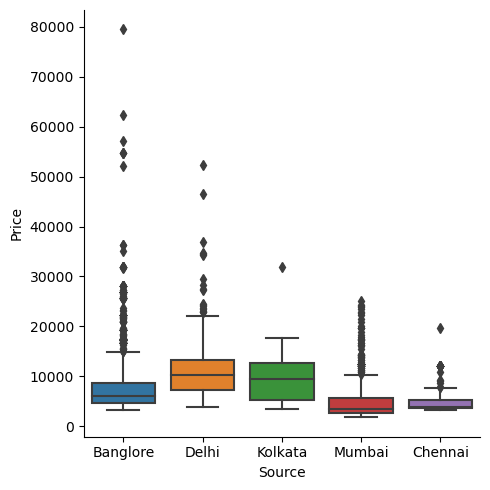

In [22]:
#Plotting boxplot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = dataset.sort_values("Price", ascending = False),
            kind="box", height = 5, 
            aspect = 1)
plt.show()

FINDINGS: Now with the help of cat plot only we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

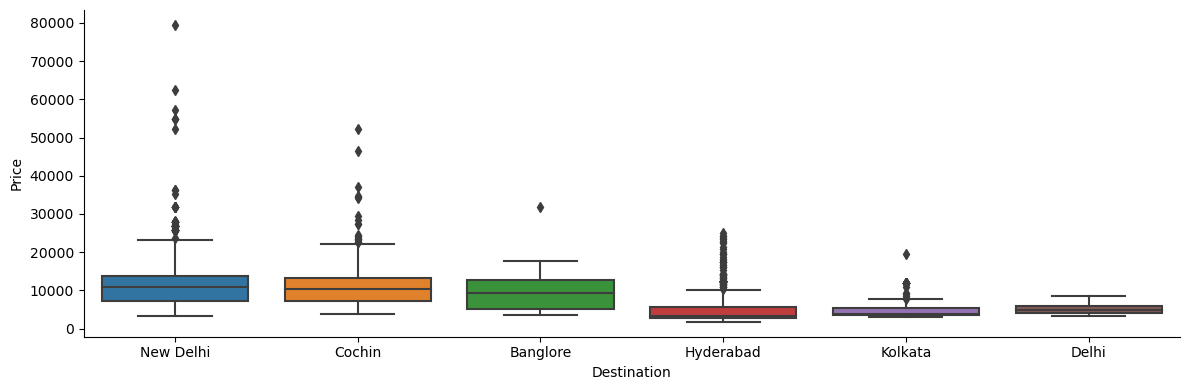

In [23]:
#Plotting box plot for Price vs Destination

sns.catplot(y = "Price", x = "Destination", data = dataset.sort_values("Price", ascending = False), kind="box", height = 4,
            aspect = 3)
plt.show()

FINDINGS: Here we are plotting the box plot with the help of a cat plot between the price of the flight and the destination to which the passenger is travelling and figured out that New Delhi has the most outliers and Kolkata has the least.


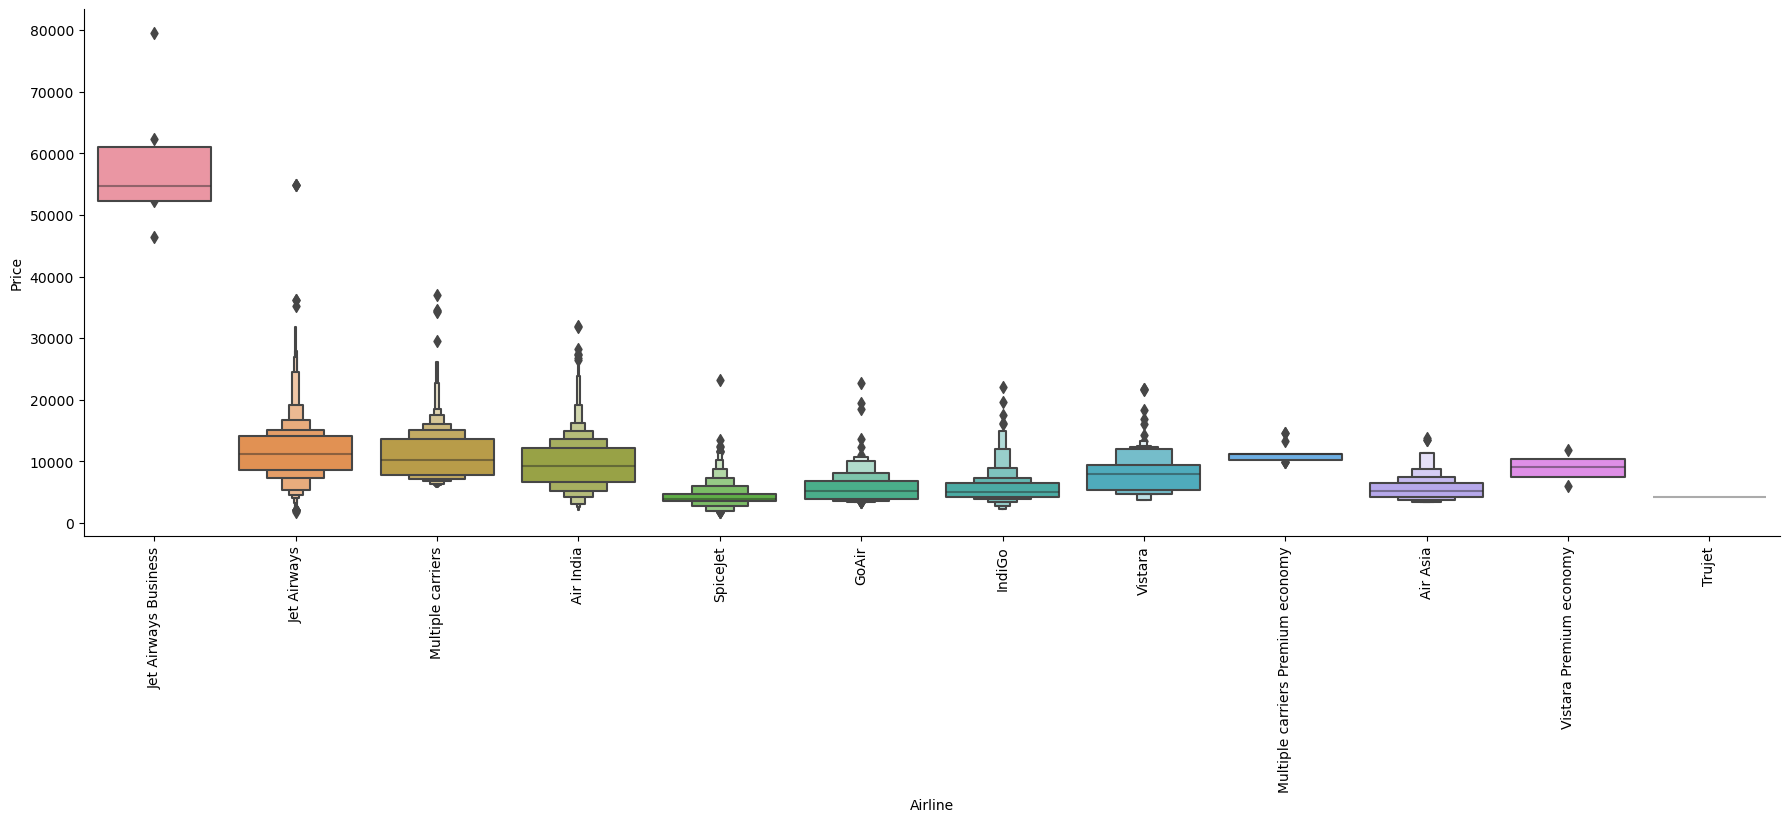

In [24]:
#Plotting Price vs Airline plot

sns.catplot(y = "Price", x = "Airline", data = dataset.sort_values("Price", ascending = False), kind="boxen",
            height = 6, aspect = 3)
plt.xticks(rotation = 90)

plt.show()

FINDINGS: Here with the help of the cat plot we are trying to plot the boxplot between the price of the flight and airline and we can see that Jet Airways has the most outliers in terms of price.

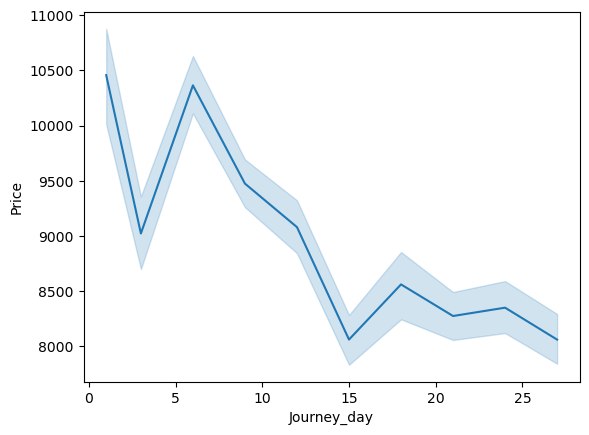

In [25]:
#plotting graph for journey_day and Price
sns.lineplot(x = 'Journey_day',y = 'Price', data = dataset)
plt.show()

FINDINGS: Here with the help of the line plot we are trying to plot the linegraph between the price of the flight and journey_day we can see that if the journey day comes near the price of the flight also increases.

Text(0, 0.5, 'Number of flights')

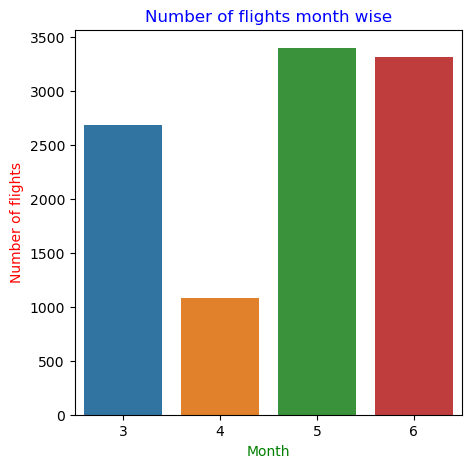

In [26]:
#Plotting Bar chart for Months (Duration) vs Number of Flights

plt.figure(figsize = (5, 5))
plt.title('Number of flights month wise',color='blue')
ax=sns.countplot(x = 'Journey_month', data = dataset)
plt.xlabel('Month',color='green')
plt.ylabel('Number of flights',color='red')

Findings: Here in the above graph we have plotted the count plot for journey in a month vs several flights and we can see that May has the most number of flights.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

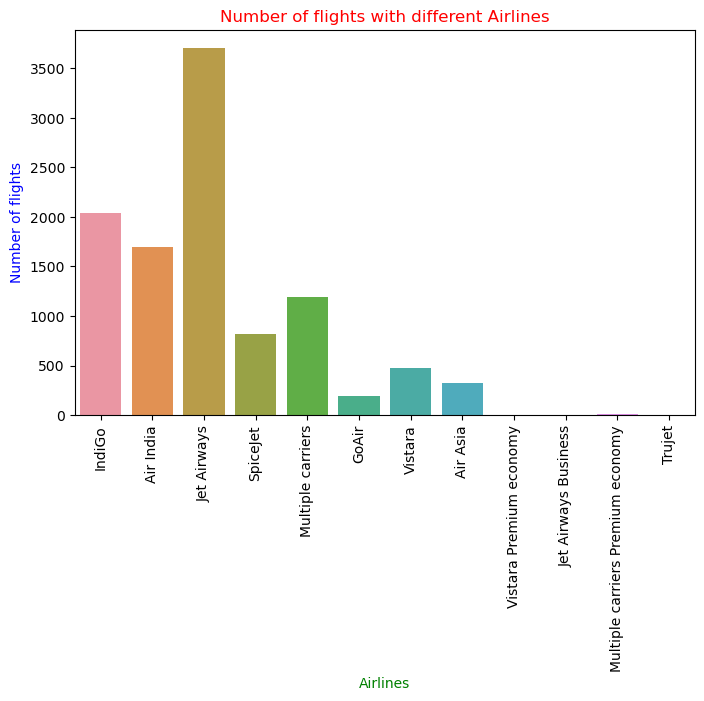

In [27]:
#Plotting Bar chart for Types of Airline vs Number of Flights

plt.figure(figsize = (8,5))
plt.title('Number of flights with different Airlines',color='red')
ax=sns.countplot(x = 'Airline', data =dataset)
plt.xlabel('Airlines',color='green')
plt.ylabel('Number of flights',color='blue')
plt.xticks(rotation = 90)

FINDINGS:The above graph depicts the relation between the type of airline and number of flights. we can see that Jet Airways has the most flight boarded.

In [28]:
def preprocess(data):
    data.dropna(inplace = True)
    data.drop_duplicates(inplace = True)
    
    data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0')
    data['Total_Stops'] = data['Total_Stops'].replace('1 stop', '1')
    data['Total_Stops'] = data['Total_Stops'].replace('2 stops', '2')
    data['Total_Stops'] = data['Total_Stops'].replace('3 stops', '3')
    data['Total_Stops'] = data['Total_Stops'].replace('4 stops', '4')
    
    data['Destination'] = np.where(data['Destination'] == 'New Delhi', 'Delhi', data['Destination'])
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business','Jet Airways',data['Airline'])
    
    dataset.drop("Additional_Info",axis=1,inplace=True)

    return data, dataset

In [29]:
dataset

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,non-stop,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,non-stop,12648,1,3,11,30,14,10


In [30]:
#doing label encoding to convert object data type to integer data type as model only takes input as integer

from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
dataset.Airline= la.fit_transform(dataset.Airline)
dataset.Journey_day = la.fit_transform(dataset.Journey_day)
dataset.Journey_month = la.fit_transform(dataset.Journey_month)
dataset.Source = la.fit_transform(dataset.Source)
dataset.Destination = la.fit_transform(dataset.Destination)
dataset.Route = la.fit_transform(dataset.Route)
dataset.Dep_hour = la.fit_transform(dataset.Dep_hour)
dataset.Dep_min= la.fit_transform(dataset.Dep_min)
dataset.Arrival_hour = la.fit_transform(dataset.Arrival_hour)
dataset.Arrival_min = la.fit_transform(dataset.Arrival_min)
dataset.Duration = la.fit_transform(dataset.Duration)
dataset.Total_Stops = la.fit_transform(dataset.Total_Stops)

dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,240,4,3897,8,0,22,4,1,2
1,1,3,0,84,336,1,7662,0,2,5,10,13,3
2,4,2,1,118,106,1,13882,3,3,9,5,4,5
3,3,3,0,91,311,0,6218,4,2,18,1,23,6
4,3,0,5,29,303,0,13302,0,0,16,10,21,7


In [31]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,240,4,3897,8,0,22,4,1,2
1,1,3,0,84,336,1,7662,0,2,5,10,13,3
2,4,2,1,118,106,1,13882,3,3,9,5,4,5
3,3,3,0,91,311,0,6218,4,2,18,1,23,6
4,3,0,5,29,303,0,13302,0,0,16,10,21,7


In [38]:
#Create dummy columns out of the Destination column.
destination = dataset[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()
#As Destination is also a categorical column, so we will make dummy columns out of it.

,Destination
0,5
1,0
2,1
3,0
4,5


In [39]:
#Dropping crap columns.-- irrelevant, redundant, contain too many missing values, or don't contribute meaningfully to analysis.
dataset.drop(['Route'],inplace=True,axis=1)

In [40]:
#Checking values in the Total stops column.
dataset['Total_Stops'].value_counts()

Total_Stops
0    5625
4    3475
1    1318
2      43
3       1
Name: count, dtype: int64

In [41]:
#Converting labels into numbers in the Total_stops column.
# acc to the data, price is directly prop to the no. of stops
dataset['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,240,4,3897,8,0,22,4,1,2
1,1,3,0,336,1,7662,0,2,5,10,13,3
2,4,2,1,106,1,13882,3,3,9,5,4,5
3,3,3,0,311,0,6218,4,2,18,1,23,6
4,3,0,5,303,0,13302,0,0,16,10,21,7


In [50]:
#Taking out train data.
x = dataset.drop('Price',axis=1)
x.head()

#Here we are taking our training data.We have taken all the columns except the Price column, which is our target column.

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,240,4,8,0,22,4,1,2
1,1,3,0,336,1,0,2,5,10,13,3
2,4,2,1,106,1,3,3,9,5,4,5
3,3,3,0,311,0,4,2,18,1,23,6
4,3,0,5,303,0,0,0,16,10,21,7


In [51]:
#Take out train data labels.
y =dataset['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

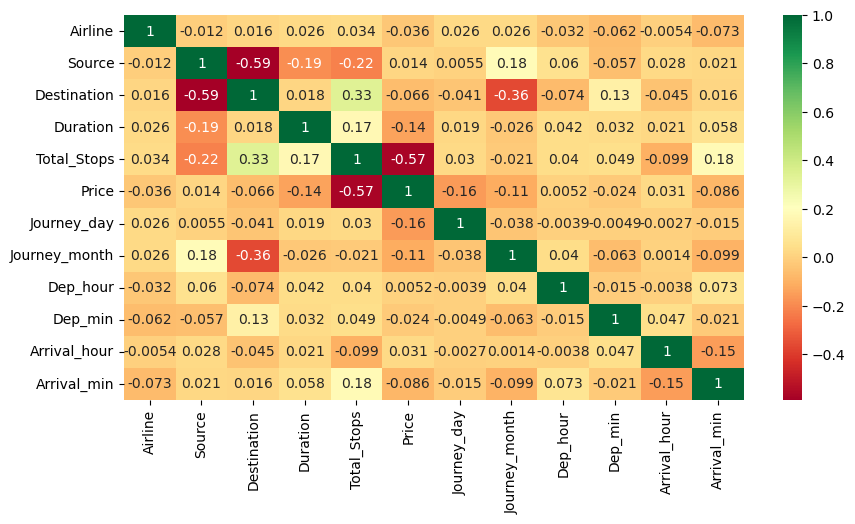

In [52]:
#Correlation between all Features
#Plotting Correlation


plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")
plt.show()

FINDINGS: Just checking the correlation between different features of training data.We can see that Total_stops is highly correlated with Duration_hours which is very obvious. If the no. of stops would increase, the duration hours of the flight will also increase. Also, price is highly correlated with total stops because if stops would increase that would also require a high quantity of fuel, and that would increase the price.

​

RANDOMFOREST ALGORITHM

In [53]:
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,240,4,3897,8,0,22,4,1,2
1,1,3,0,336,1,7662,0,2,5,10,13,3
2,4,2,1,106,1,13882,3,3,9,5,4,5
3,3,3,0,311,0,6218,4,2,18,1,23,6
4,3,0,5,303,0,13302,0,0,16,10,21,7


In [54]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Using ExtraTreesRegressor to identify important features means leveraging a machine learning model that builds multiple 
decision trees to measure the relevance of each feature in predicting the target variable. The algorithm assigns an importance
score to each feature based on how much it contributes to reducing the error across the trees.


In [56]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [57]:
#First try out the ExtraTreesRegressor model for Flight Price Prediction.

reg = ExtraTreesRegressor()
reg.fit(x,y)
print(reg.feature_importances_)

[0.15173392 0.01676013 0.02974452 0.0397727  0.42228875 0.1600009
 0.05402963 0.0304417  0.03137008 0.03705382 0.02680385]


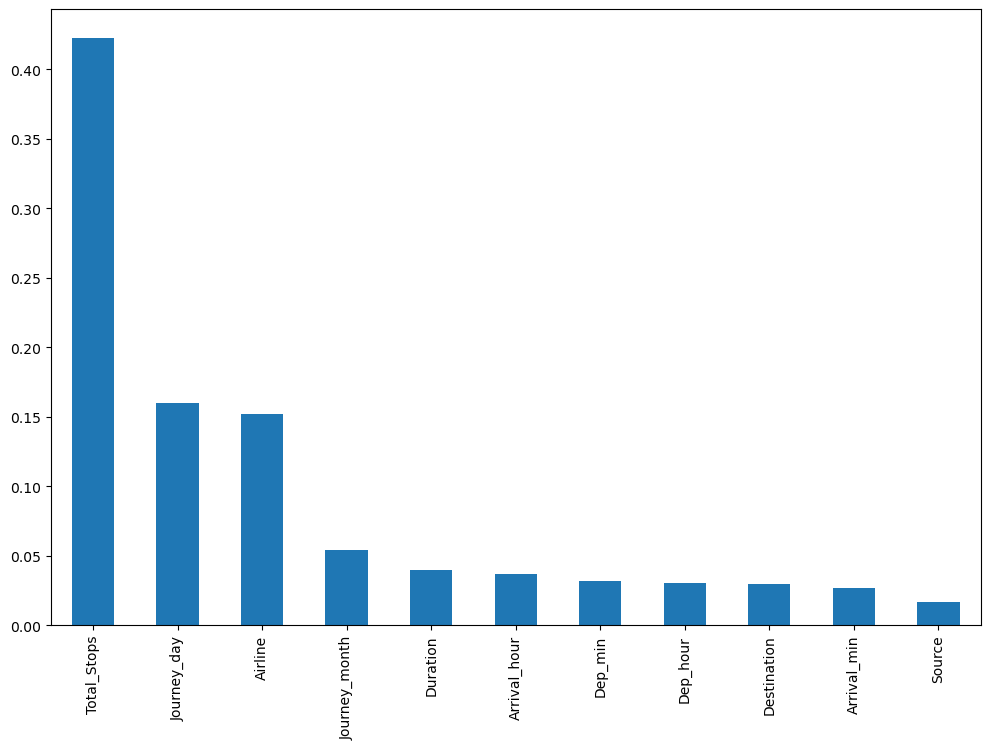

In [58]:
#Checking feature importance given by ExtraTreeRegressor.
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()


In [59]:
#Splitting our data into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=40)

In [60]:
# Number of trees in random forest
#number of trees in an ensemble model
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
#'auto': Uses all features.'sqrt': Uses the square root of the total number of features.
max_features = ['auto', 'sqrt'] 

# Maximum number of levels in tree --This creates a list of 6 evenly spaced integers between 
#5 and 30 to set the maximum depth of decision trees in a model.
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
# specifies the minimum number of samples required to split an internal node in a decision tree,
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
#specifies the minimum number of samples required to be at a leaf node, where values 
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
#Here we are using RandomizedSearchCV which just randomly tries out combinations and sees which one is the best out of them.
#We have declared the parameters of RandomForestRegressor which we want to try.

In [61]:
#Checking the best parameters we got using Randomized Search CV.
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [62]:
#Taking Predictions
# Flight Price Prediction
prediction = rf_random.predict(x_test)

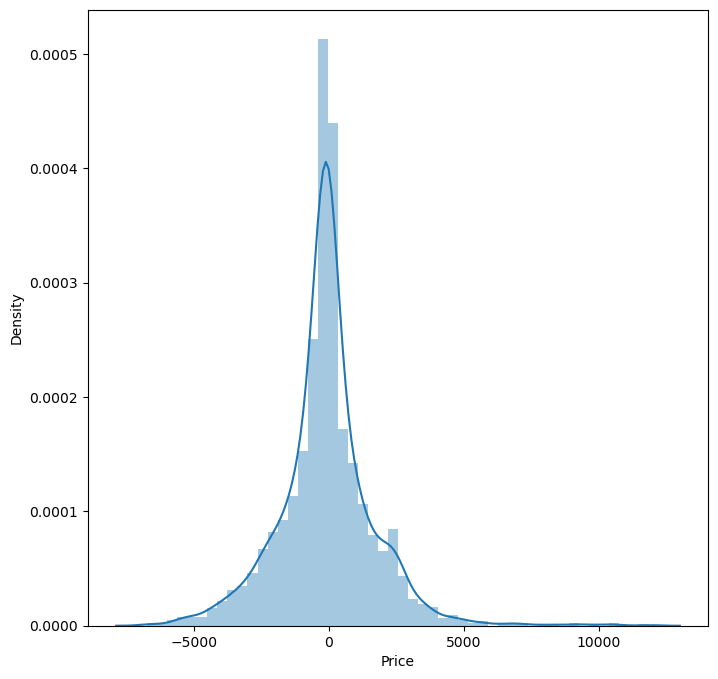

In [63]:
#Plotting the residuals.
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

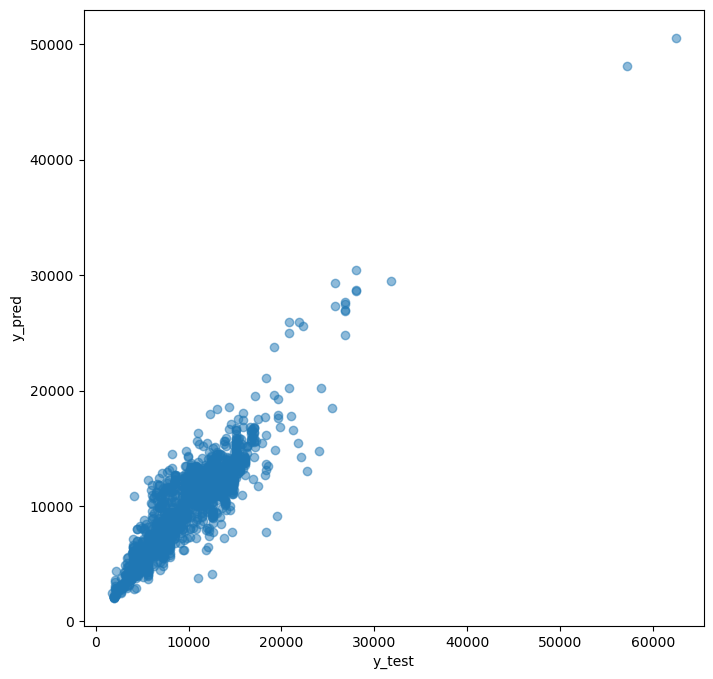

In [64]:
#Plotting y_test vs predictions.
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [66]:
x = dataset.iloc[:,:-1]
y = dataset.Price
x,y

(       Airline  Source  Destination  Duration  Total_Stops  Price  \
 0            3       0            5       240            4   3897   
 1            1       3            0       336            1   7662   
 2            4       2            1       106            1  13882   
 3            3       3            0       311            0   6218   
 4            3       0            5       303            0  13302   
 ...        ...     ...          ...       ...          ...    ...   
 10678        0       3            0       236            4   4107   
 10679        1       3            0       237            4   4145   
 10680        4       0            2       280            4   7229   
 10681       10       0            5       238            4  12648   
 10682        1       2            1       347            1  11753   
 
        Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  
 0                8              0        22        4             1  
 1                

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [68]:
#checking of null values in dataset

print(x_train.isnull().sum())
print(y_train.isnull().sum())
print(x_test.isnull().sum())
print(y_test.isnull().sum())

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_day      0
Journey_month    0
Dep_hour         0
Dep_min          0
Arrival_hour     0
dtype: int64
0
Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_day      0
Journey_month    0
Dep_hour         0
Dep_min          0
Arrival_hour     0
dtype: int64
0


In [69]:
# Convert columns to numeric, setting errors='coerce' to turn non-convertible values to NaN
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')

# Check for any remaining NaNs after conversion
print(x_train.isnull().sum())
print(x_test.isnull().sum())  # Fixed the syntax error by adding the missing parenthesis

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_day      0
Journey_month    0
Dep_hour         0
Dep_min          0
Arrival_hour     0
dtype: int64
Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_day      0
Journey_month    0
Dep_hour         0
Dep_min          0
Arrival_hour     0
dtype: int64


In [70]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Align the train and test sets after encoding to ensure they have the same columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

Sklearn.impute import SimpleImputer is a tool for handling missing data in datasets by imputing (filling) missing values with specified strategies, such as the mean, median, or most frequent value of the column. It helps ensure that datasets are complete and ready for further analysis or modeling.

In [71]:
from sklearn.impute import SimpleImputer 
# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
x_train = imputer.fit_transform(x_train)
x_test= imputer.transform(x_test)

MODEL SELECTION

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)*100,model.score(x_train,y_train)*100

(99.9596332658132, 99.92466970878642)

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)*100,model.score(x_train,y_train)*100

(100.0, 100.0)

In [74]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)*100,model.score(x_train,y_train)*100

(99.95343211608521, 100.0)

INITIALISE THE MODELS

In [75]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import pickle
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MODEL TRAINING


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

MODEL EVALUATION


In [77]:
def predict(ml_model):
    print('Model Name: {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    print('Training Score: {}'.format(model.score(x_train,y_train)))
    pred = model.predict(x_test)
    
    r2score = r2_score(y_test,pred)
    print('R squared: {}'.format(r2score))  #reveals how well your machine learning model fits the data it was trained on.
    print('MAE: {}'.format(mean_absolute_error(y_test,pred)))  #accuracy of regression models
    print('MSE: {}'.format(mean_squared_error(y_test,pred)))  # accuracy of the predictive models.
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,pred))))  #accuracy of our model in predicting the target values
    

In [78]:
predict(LinearRegression())

Model Name: LinearRegression()
Training Score: 1.0
R squared: 1.0
MAE: 4.7745212784185614e-12
MSE: 4.033310732492272e-23
RMSE: 6.350835167513224e-12


In [79]:
predict(DecisionTreeRegressor())

Model Name: DecisionTreeRegressor()
Training Score: 1.0
R squared: 0.9986616844124848
MAE: 6.047300525561395
MSE: 27904.249880554227
RMSE: 167.04565208515373


In [80]:
predict(RandomForestRegressor())

Model Name: RandomForestRegressor()
Training Score: 0.9995525578371467
R squared: 0.9999221823711677
MAE: 3.126889632107035
MSE: 1622.5190682274206
RMSE: 40.28050481594565


In [81]:
predict(XGBRegressor())

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training Score: 0.9999736108498034
R squared: 0.9739793547384131
MAE: 51.4175089887609
MSE: 542537.6452355866
RMSE: 736.571547940583
